#### Task: Goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

In [143]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [144]:
data = pd.read_excel('C:/Users/samar/OneDrive/Desktop/MLFW Project 1/MLFW PROJECT 2/Wholesale customers data.xlsx')

In [145]:
data.shape

(440, 8)

In [146]:
type(data)

pandas.core.frame.DataFrame

In [147]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [149]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##### We can see from standard deviation that our data is distributed widely so we will have to scale our data.

In [150]:
# Exploring the number of unique values for each feature
for col in data.columns:
    print('{}: {} unique values'.format(col, data[col].nunique()))

Channel: 2 unique values
Region: 3 unique values
Fresh: 433 unique values
Milk: 421 unique values
Grocery: 430 unique values
Frozen: 426 unique values
Detergents_Paper: 417 unique values
Delicassen: 403 unique values


We can observe that Channel and Region have just 2 and 3 unique values respectively so either of them can be used as the target variable.

In [151]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

##### Therefore, no null values in our data.

<AxesSubplot:ylabel='Density'>

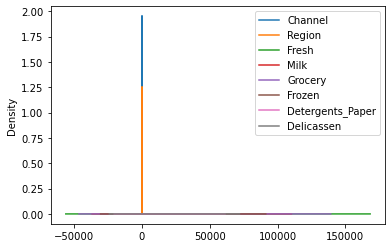

In [152]:
data.plot.kde()

##### We can see from kde plot that our data is vastly distributed, therefore we need to do scaling.

### Scaling

###### 1 - Min/Max Normalization

In [153]:
data_min_max = (data-data.min())/(data.max()-data.min())

In [154]:
data_min_max

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


Therefore, our data is now Min_Max normalized in "data_min_max" dataframe.

In [155]:
data_min_max.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

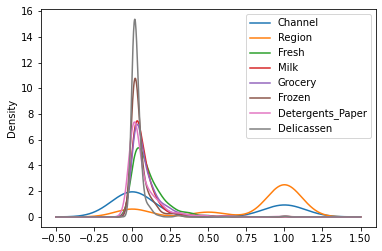

In [156]:
data_min_max.plot.kde()

##### We can observe that our data is still a bit widely distributed by using min/max scaling.

##### 2 - Standard Scaler

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
std_scaler = StandardScaler()
 
data_std_scale = std_scaler.fit_transform(data.to_numpy())
data_std_scale = pd.DataFrame(data_std_scale, columns=[
                                  'Channel','Region','Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [159]:
data_std_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


Therefore, our data is now Standard Scalar normalized in "data_std_scale" dataframe.

In [160]:
data_std_scale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

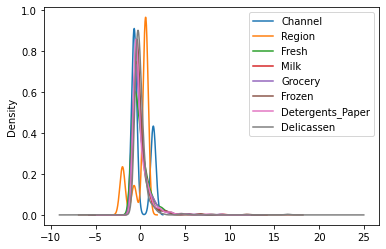

In [161]:
data_std_scale.plot.kde()

##### We can see that data is normally distributed(Gaussian distribution) in Standard Scaler, so we will be using this for further data analysis in our project.

### Recursive Feature Elimination with Cross-Validation(RFECV)

In [162]:
new_data = data.drop('Channel', axis = 1) 
#removing Channel
target = data['Channel']

In [163]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# define the method
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
#fit the model
rfecv.fit(new_data, target)

RFECV(estimator=RandomForestClassifier())

In [164]:
# transform the data to dataframe
rfe_dataframe = pd.DataFrame(rfecv.ranking_, index=new_data.columns, columns = ['Ranking']).sort_values(by='Ranking',ascending=True)
rfe_dataframe

,Ranking
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Region,2


In [165]:
print("Optimal number of features using RFECV: ", rfecv.n_features_)

Optimal number of features using RFECV:  6


In [166]:
rfecv.support_

array([False,  True,  True,  True,  True,  True,  True])

In [167]:
rfecv.ranking_

array([2, 1, 1, 1, 1, 1, 1])

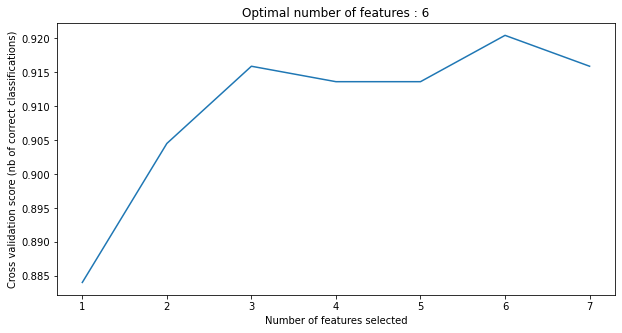

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

Optimal number of features using RFECV vs. Cross-Validation: 3


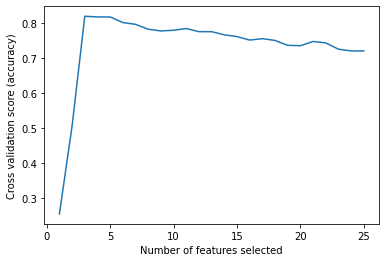

In [169]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
new_data, target = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv2 = RFECV(estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy", min_features_to_select=min_features_to_select,)
rfecv2.fit(new_data, target)
print("Optimal number of features using RFECV vs. Cross-Validation: %d" % rfecv2.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(rfecv2.grid_scores_) + min_features_to_select), rfecv2.grid_scores_)
plt.show()

### Building and running your model with K-means Clustering

In [170]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#Within-Cluster Sum of Square(wcss)
wcss = [] 
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std_scale) 
    wcss.append(kmeans.inertia_)

### Plotting your model to find elbow to determine optimal number of clusters

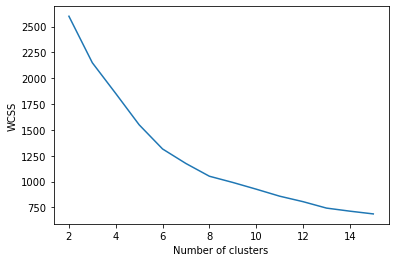

In [171]:
plt.plot(range(2, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 2(in our usecase). When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

##### The point at which the elbow shape is created is 8, that is, our K value or an optimal number of clusters is 8.

### Principal Component Analysis

In [172]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
data_std_scale_pca = pca.fit_transform(data_std_scale)

pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354, 0.03514076, 0.00784877])

##### The varience of first two variables is: 38.75 and 22.37, which implies Cumulative Variance: 61.12%
##### The variance explained by first 4 components is: 38.75, 22.37, 12.64 and 9.22 which implies Cumuluative Variance : 82.98%

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

##### The first 2 components only give us a Cumulative Variance of 61.12% which implies that the components we have are not sufficient to explain your model.

##### Therefore, we will use the first four components in our Algorithms to do analysis on Wholesale Customers Data, as we can see after doing Principal Component Analysis, the Cumulative Variance of the first four variables, namely, Channel, Region, Fresh and Milk is 82.98% which is ideal for the model to fit. It will avoid overfitting and underfitting in our models.

In [173]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [174]:
pca_components = pd.DataFrame(pca.components_, columns=['Channel','Region','Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
pca_components

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.428292,0.024726,-0.025319,0.474410,0.536329,-0.029975,0.523906,0.164997
1,-0.204699,0.043130,0.513445,0.205541,-0.008718,0.592745,-0.121083,0.533181
2,-0.082980,-0.982501,-0.088951,0.025751,0.045314,0.122157,0.047481,-0.000930
3,0.029644,0.077845,-0.798476,0.054022,-0.121586,0.161317,-0.151012,0.537558
4,-0.036206,0.132509,-0.258117,-0.072086,0.111730,0.754212,0.176503,-0.544827
5,-0.863507,0.089765,-0.147475,0.315933,0.213699,-0.194360,0.195754,-0.054533
6,0.139899,-0.023280,-0.027174,0.789020,-0.353064,-0.005337,-0.371374,-0.306583
7,0.019335,-0.001545,-0.033851,-0.039291,0.715984,-0.012983,-0.691672,-0.075643


<AxesSubplot:>

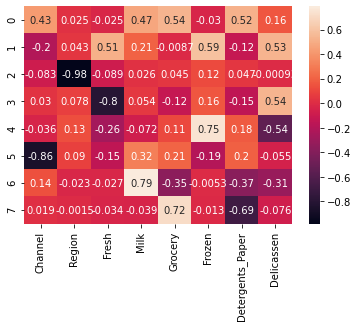

In [175]:
import seaborn as sb
sb.heatmap(pca_components, annot=True)

##### We can infer from this visualization that:
##### Region, Milk, Grocery, Detergents Paper and Delicassen are positively correlated to Channel, whereas, Fresh and Frozen are negatively correlated to Channel component.
##### Similarly, Fresh, Milk, Frozen and Delicassen are positively correlated to Region, whereas, Channel, Grocery and Detergents Paper are negatively related to Region. We can use this heatmap to infer correlations for all of our components in this manner.

### Implementing XGBoost Classifier with 5 Fold cross-validation

We will be using our data(Wholesale Customers Sale) which was given to us as it is, since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs.

In [176]:
#Features:
X = data.drop('Channel', axis=1)
#Target:
y = data['Channel']

In [177]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [178]:
#Converting labels(y,Channel) to 0 and 1, binary form, to apply in data matrix
y[y == 2] = 0

y[y == 1] = 1 

In [179]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [180]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [181]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [182]:
results = cross_val_score(model, X, y, cv=kfold)
Accuracy= results.mean()*100
STD = results.std()*100
print("Accuracy mean: %.2f%%" % Accuracy)
print("Accuracy STD: %.2f%%" % STD)

Accuracy mean: 91.14%
Accuracy STD: 2.08%


Using 5-fold Cross-Validation

In [183]:
PW = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

In [184]:
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))
f1score= (round(2*((Recall*Precision)/(Recall+Precision)),3))

In [185]:
print("Accuracy= %f" %Accuracy)
print("Recall= %f" % Recall)
print("Precision= %f" % Precision)
print("f1score= %f" % f1score)

Accuracy= 91.136364
Recall= 91.136000
Precision= 90.540000
f1score= 90.837000


#### We can observe that the model's Recall is 91.3%  and Precision is 90.54%. Therefore, the model has a high accuracy of 91.13%.
#### If our model has high precision and high recall we can safely say that we have a highly accurate model. 